In [1]:
import iexfinance as iex

# Realtime data feed

In [2]:
tsla = iex.stocks.Stock('TSLA')
tsla.get_price()

296.38

In [3]:
lst = iex.stocks.Stock(["AAPL", "MSFT"])
lst.get_price()

{'AAPL': 156.3, 'MSFT': 105.08}

# Historical data feed

## Daily

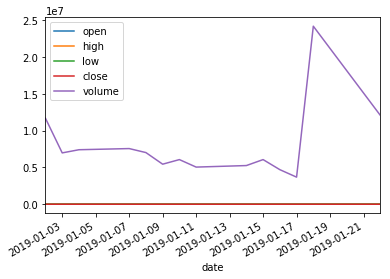

In [21]:
from datetime import datetime, date
import matplotlib.pyplot as plt

start = datetime(2019, 1, 1)
end = datetime(2019, 1, 22)

df = iex.stocks.get_historical_data("TSLA", start, end, output_format='pandas')

df.plot()
plt.show()

## Minutely

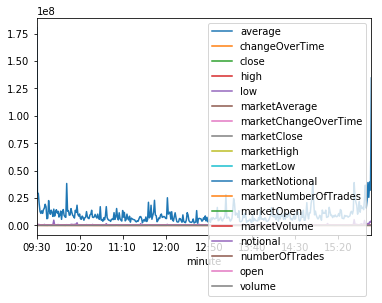

In [22]:
df = iex.stocks.get_historical_intraday("AAPL", date=end, output_format='pandas')

df.plot()
plt.show()

In [23]:
df.head()

,average,changeOverTime,close,date,high,label,low,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume,notional,numberOfTrades,open,volume
minute,,,,,,,,,,,,,,,,,,,,
09:30,156.440,0.000000,156.440,20190122,156.675,09:30 AM,156.22,156.565,0.000000,156.468,156.73,156.20,1.803694e+08,2390,156.40,1152045,1143416.885,77,156.575,7309
09:31,156.470,0.000192,156.400,20190122,156.650,09:31 AM,156.20,156.438,-0.000811,156.400,156.70,156.17,2.921249e+07,1165,156.43,186735,747459.895,45,156.520,4777
09:32,156.178,-0.001675,156.190,20190122,156.415,09:32 AM,155.95,156.133,-0.002759,156.190,156.59,155.93,2.917576e+07,1315,156.39,186865,821650.180,43,156.415,5261
09:33,156.013,-0.002729,155.830,20190122,156.200,09:33 AM,155.78,155.923,-0.004101,155.830,156.59,155.77,1.994175e+07,812,156.19,127895,764150.420,45,156.200,4898
09:34,155.797,-0.004110,155.815,20190122,155.840,09:34 AM,155.73,155.798,-0.004899,155.800,155.88,155.68,1.270317e+07,703,155.87,81536,137101.365,13,155.830,880


# Live Data Feed

## Book

In [68]:
book = iex.get_market_book("AAPL")
book

{'AAPL': {'bids': [{'price': 153.14, 'size': 100, 'timestamp': 1548273683219},
   {'price': 153.13, 'size': 200, 'timestamp': 1548273683219},
   {'price': 152.53, 'size': 100, 'timestamp': 1548273498738},
   {'price': 152.5, 'size': 100, 'timestamp': 1548272862732},
   {'price': 151.92, 'size': 100, 'timestamp': 1548273326661},
   {'price': 150.2, 'size': 111, 'timestamp': 1548263814512},
   {'price': 148.25, 'size': 100, 'timestamp': 1548253824135},
   {'price': 144.7, 'size': 300, 'timestamp': 1548253802841},
   {'price': 140.48, 'size': 100, 'timestamp': 1548253804305},
   {'price': 128.3, 'size': 100, 'timestamp': 1548253804478},
   {'price': 122.54, 'size': 163, 'timestamp': 1548253800164},
   {'price': 119.34, 'size': 264, 'timestamp': 1548253800164}],
  'asks': [{'price': 169.25, 'size': 100, 'timestamp': 1548253800164},
   {'price': 170, 'size': 300, 'timestamp': 1548253802850},
   {'price': 172, 'size': 100, 'timestamp': 1548253802849},
   {'price': 190.77, 'size': 181, 'times

## Live Quote

In [72]:
last = iex.get_market_last(['TSLA', 'AAPL'])
pd.DataFrame(last)

,price,size,symbol,time
0,284.66,1,TSLA,1548273785910
1,153.32,800,AAPL,1548273881779


# Valid Symbols

In [20]:
import pandas as pd

symbols = iex.get_available_symbols()
df = pd.DataFrame(data=symbols)
df.head()

,date,iexId,isEnabled,name,symbol,type
0,2019-01-23,2,True,Agilent Technologies Inc.,A,cs
1,2019-01-23,12042,True,Alcoa Corporation,AA,cs
2,2019-01-23,14924,True,Perth Mint Physical Gold,AAAU,N/A
3,2019-01-23,7653,True,Altaba Inc.,AABA,cs
4,2019-01-23,9169,True,AAC Holdings Inc.,AAC,cs


In [21]:
df.shape[0]

8727

IEX supports over 8700 tickers

## Types of Symbols

In [26]:
df.type.unique()

array(['cs', 'N/A', 'et', 'ps', 'bo', 'su', 'crypto'], dtype=object)

From: https://iextrading.com/developer/docs/#symbols

    AD - ADR
    RE - REIT
    CE - Closed End Fund
    SI - Secondary Issue
    LP - Limited Partnerships
    CS - Common Stock
    ET - ETF

In [28]:
sym_types = {"ad": "ADR",
            "re": "REIT",
            "ce": "Closed End Fund",
            "si": "Secondary Issue",
            "lp": "Limited Partnership",
            "cs": "Common Stock",
            "et": "ETF"}

## Crypto Currencies

In [27]:
fltr = df["type"] == "crypto"
df.loc[fltr, :]

,date,iexId,isEnabled,name,symbol,type
8709,2019-01-23,10000000,True,Bitcoin USD,BTCUSDT,crypto
8710,2019-01-23,10000001,True,EOS USD,EOSUSDT,crypto
8711,2019-01-23,10000002,True,Ethereum USD,ETHUSDT,crypto
8712,2019-01-23,10000003,True,Binance Coin USD,BNBUSDT,crypto
8713,2019-01-23,10000004,True,Ontology USD,ONTUSDT,crypto
8714,2019-01-23,10000005,True,Bitcoin Cash USD,BCCUSDT,crypto
8715,2019-01-23,10000006,True,Cardano USD,ADAUSDT,crypto
8716,2019-01-23,10000007,True,Ripple USD,XRPUSDT,crypto
8717,2019-01-23,10000008,True,TrueUSD,TUSDUSDT,crypto
8718,2019-01-23,10000009,True,TRON USD,TRXUSDT,crypto


# Reference Data

In [73]:
pd.DataFrame(iex.get_stats_recent())

,date,isHalfday,litVolume,marketShare,routedVolume,volume
0,2019-01-22,False,54008830,0.02495,28047683,202904421
1,2019-01-18,False,56941782,0.02573,32731871,209720796
2,2019-01-17,False,50612305,0.02735,31694991,200303462
3,2019-01-16,False,56139518,0.02761,36326805,209197744
4,2019-01-15,False,50079138,0.02698,33089471,191510571
5,2019-01-14,False,48945972,0.02810,29161151,194668593
6,2019-01-11,False,49391833,0.02818,31206184,193179889
7,2019-01-10,False,52621002,0.02687,31923325,202631579
8,2019-01-09,False,65716673,0.02847,36175745,235272634
9,2019-01-08,False,63780652,0.02724,34511560,223062999
